# Продвинутая визуализация на Seaborn

Описательная статистика, попарное сравнение, статистические графики (корреляция, линейная регрессия)

In [1]:
# Импортируем библиотеки
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузим датасет diamonds (входит в компект seaborn)
data = sns.load_dataset("diamonds")

## Особенности датасета

Этот классический набор данных содержит цены и другие характеристики почти 54 000 бриллиантов.

*price* цена  в долларах США (326–18 823 доллара США)

*carat* вес бриллианта в каратах (0,2--5,01)

*cut* качество огранки (Удовлетворительное, Хорошее, Очень хорошее, Премиум, Идеальное)

*color* цвет, от J (худший) до D (лучший)

*cclarity*c чистота – показатель качества бриллианта (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))

*x* длина в мм (0–10,74)

*у* ширина  в мм (0--58,9)

*z* глубина  в мм (0–31,8)

*depth* общая глубина в процентах = z/mean(x, y) = 2 * z/(x + y) (43--79)

*table* ширина от вершины ромба относительно самого широкого места (43--95)

In [2]:
# Посмотрим на структуру таблицы
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<div>
<img src="https://www.datocms-assets.com/25216/1652905572-d-clarity-chart.jpg" width="900"/>
</div>

In [3]:
# Выводим размер таблицы
data.shape

(53940, 10)

In [4]:
# Посмотрим на информацию о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
# Выведем описательную статистику для числовых переменных
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


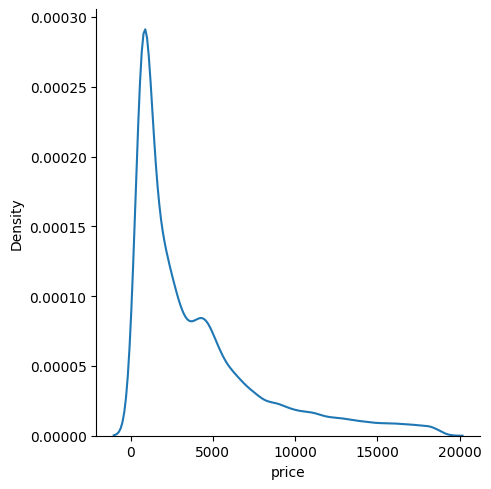

In [6]:
# Посмотрим на функцию распределения значений для цены
sns.displot(data=data, x='price', kind='kde')

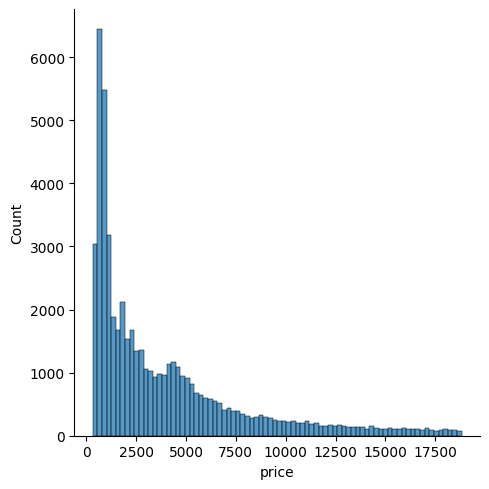

In [7]:
# Распределений значений цены можно также отобразить в виде гистограммы
sns.displot(data=data, x='price', kind='hist')

# Корреляция

В статистике, корреляция - это статистическая мера, которая показывает, насколько сильно две переменные связаны друг с другом. Корреляция измеряет степень, с которой изменения в одной переменной сопровождаются соответствующими изменениями в другой переменной.

Коэффициент корреляции может принимать значения от -1 до +1, где -1 означает, что две переменные обратно пропорциональны (когда одна переменная растет, другая уменьшается), +1 означает, что две переменные прямо пропорциональны (когда одна переменная растет, другая тоже растет), а значение 0 означает, что между переменными нет связи.

**Матрица корреляции** - это квадратная таблица, которая показывает коэффициенты корреляции между всеми парами переменных в наборе данных. Каждый элемент матрицы корреляции показывает коэффициент корреляции между двумя переменными.

Матрица корреляции обычно используется для изучения зависимостей между переменными и выявления наиболее значимых связей. Например, если в матрице корреляции присутствуют высокие значения коэффициентов корреляции между двумя переменными, это может указывать на сильную связь между ними.

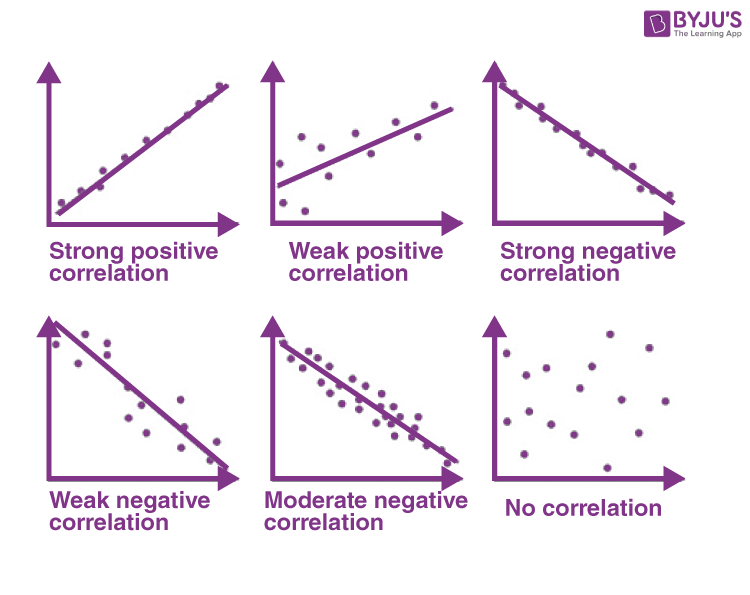

In [8]:
# Расчитаем матрицу корреляции для всех числовых переменных
corr_matrix = data.corr()

<ipython-input-8-42ad1acc5f79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [9]:
# Построим корреляционную матриццу
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


# Тепловые карты

<Axes: >

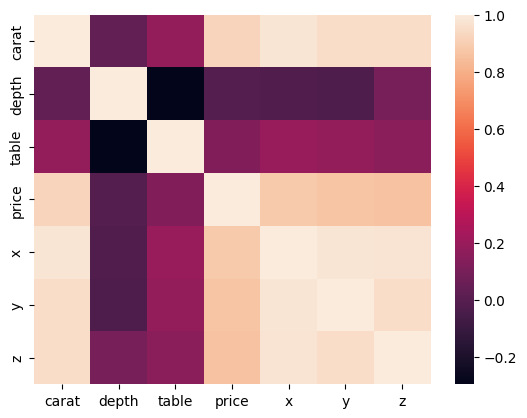

In [10]:
sns.heatmap(corr_matrix)

<Axes: >

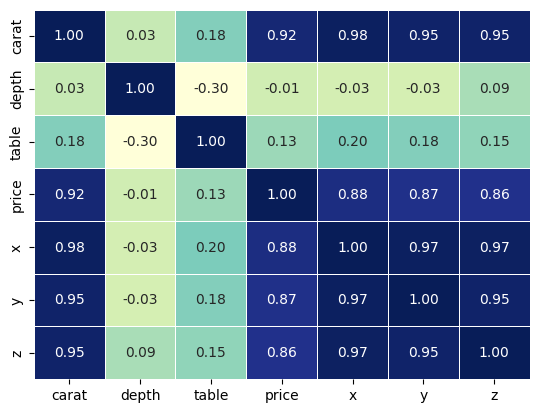

In [11]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, linewidth=0.5)

# Линейная регрессия

Линейная регрессия - это статистический метод, который используется для изучения отношений между двумя переменными, где одна переменная (называемая зависимой переменной) зависит от другой переменной (называемой независимой переменной).

В линейной регрессии мы предполагаем, что существует линейная связь между зависимой и независимой переменными, то есть изменения в независимой переменной вызывают изменения в зависимой переменной. Метод линейной регрессии находит линейную функцию (уравнение прямой), которая наилучшим образом описывает эту связь.

Формально, линейная регрессия моделирует зависимую переменную Y как линейную комбинацию независимой переменной X и некоторого шума (ошибки модели):

Y = b0 + b1*X + e

где b0 и b1 - коэффициенты регрессии, которые определяют угол и смещение прямой, а e - случайный шум, который не объясняется независимой переменной.

Для поиска оптимальных значений коэффициентов b0 и b1 используется метод наименьших квадратов (OLS), который минимизирует сумму квадратов ошибок между прогнозами модели и реальными значениями зависимой переменной. Это позволяет найти линейную функцию, которая наилучшим образом соответствует данным.

Линейная регрессия широко используется в различных областях, таких как экономика, финансы, маркетинг, наука о материалах и т.д. Она может быть расширена для моделирования зависимости между несколькими независимыми переменными и зависимой переменной (множественная линейная регрессия), а также для решения задач классификации (логистическая регрессия).

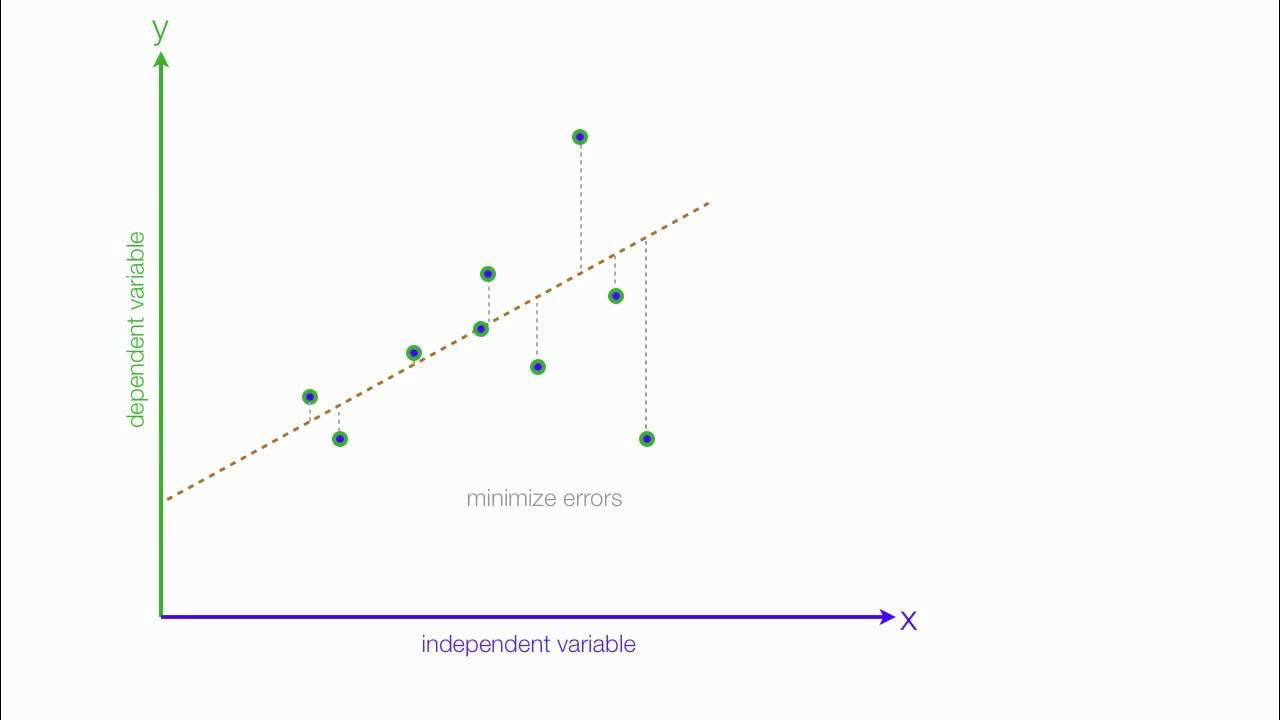

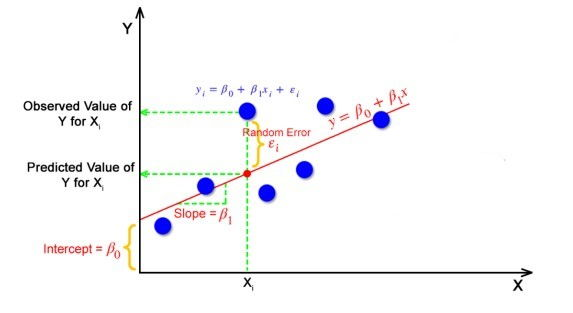

<Axes: xlabel='carat', ylabel='price'>

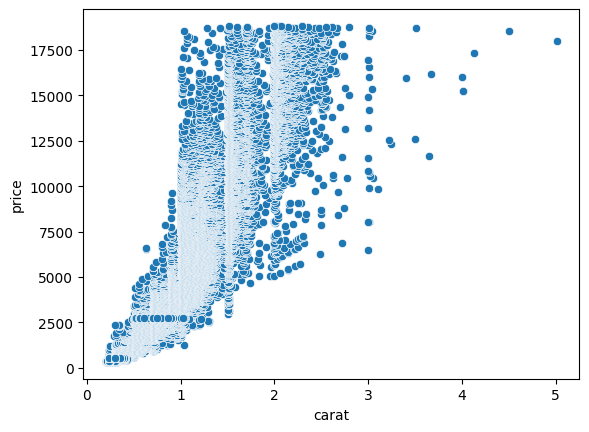

In [12]:
# Построим рассеянный (точечный) график для каратности камня и его цены с помощью библиотеки Seaborn
sns.scatterplot(data=data, x='carat', y='price')

<Axes: xlabel='carat', ylabel='price'>

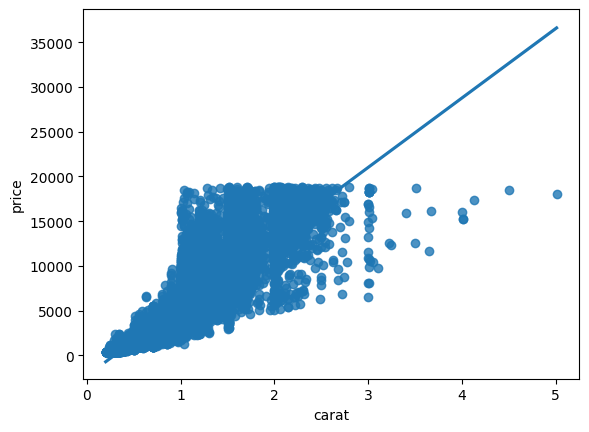

In [13]:
# Построим рассеянный (точечный) график с регрессионной линией для каратности камня и его цены с помощью функции regplot
sns.regplot(data=data, x='carat', y='price')

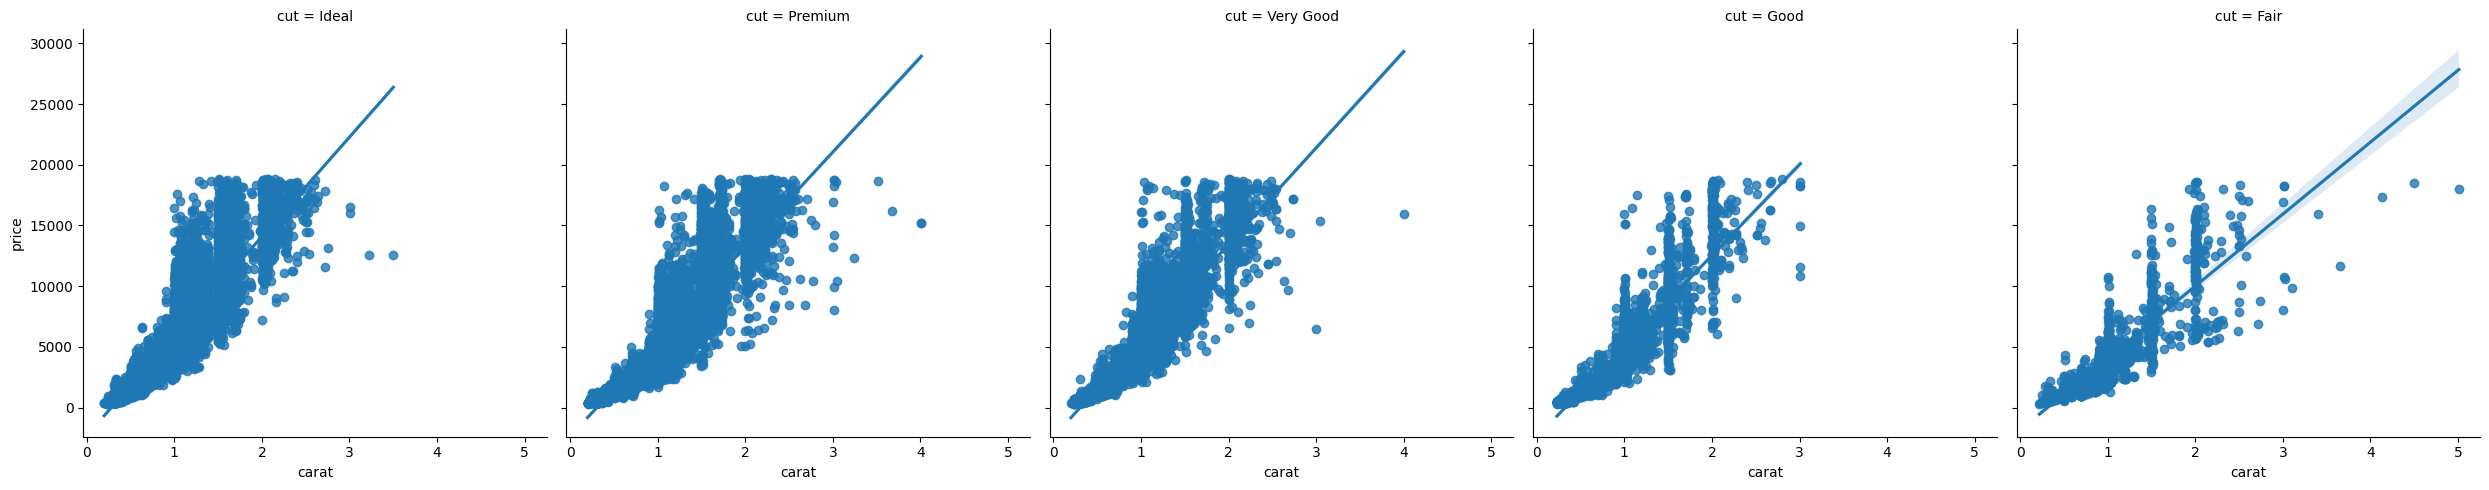

In [14]:
# Построим график с регрессионной линией для каратности камня и его цены с помощью функции lmplot, разделим на под-графики по огранке камня
sns.lmplot(data=data, x='carat', y='price', col='cut')

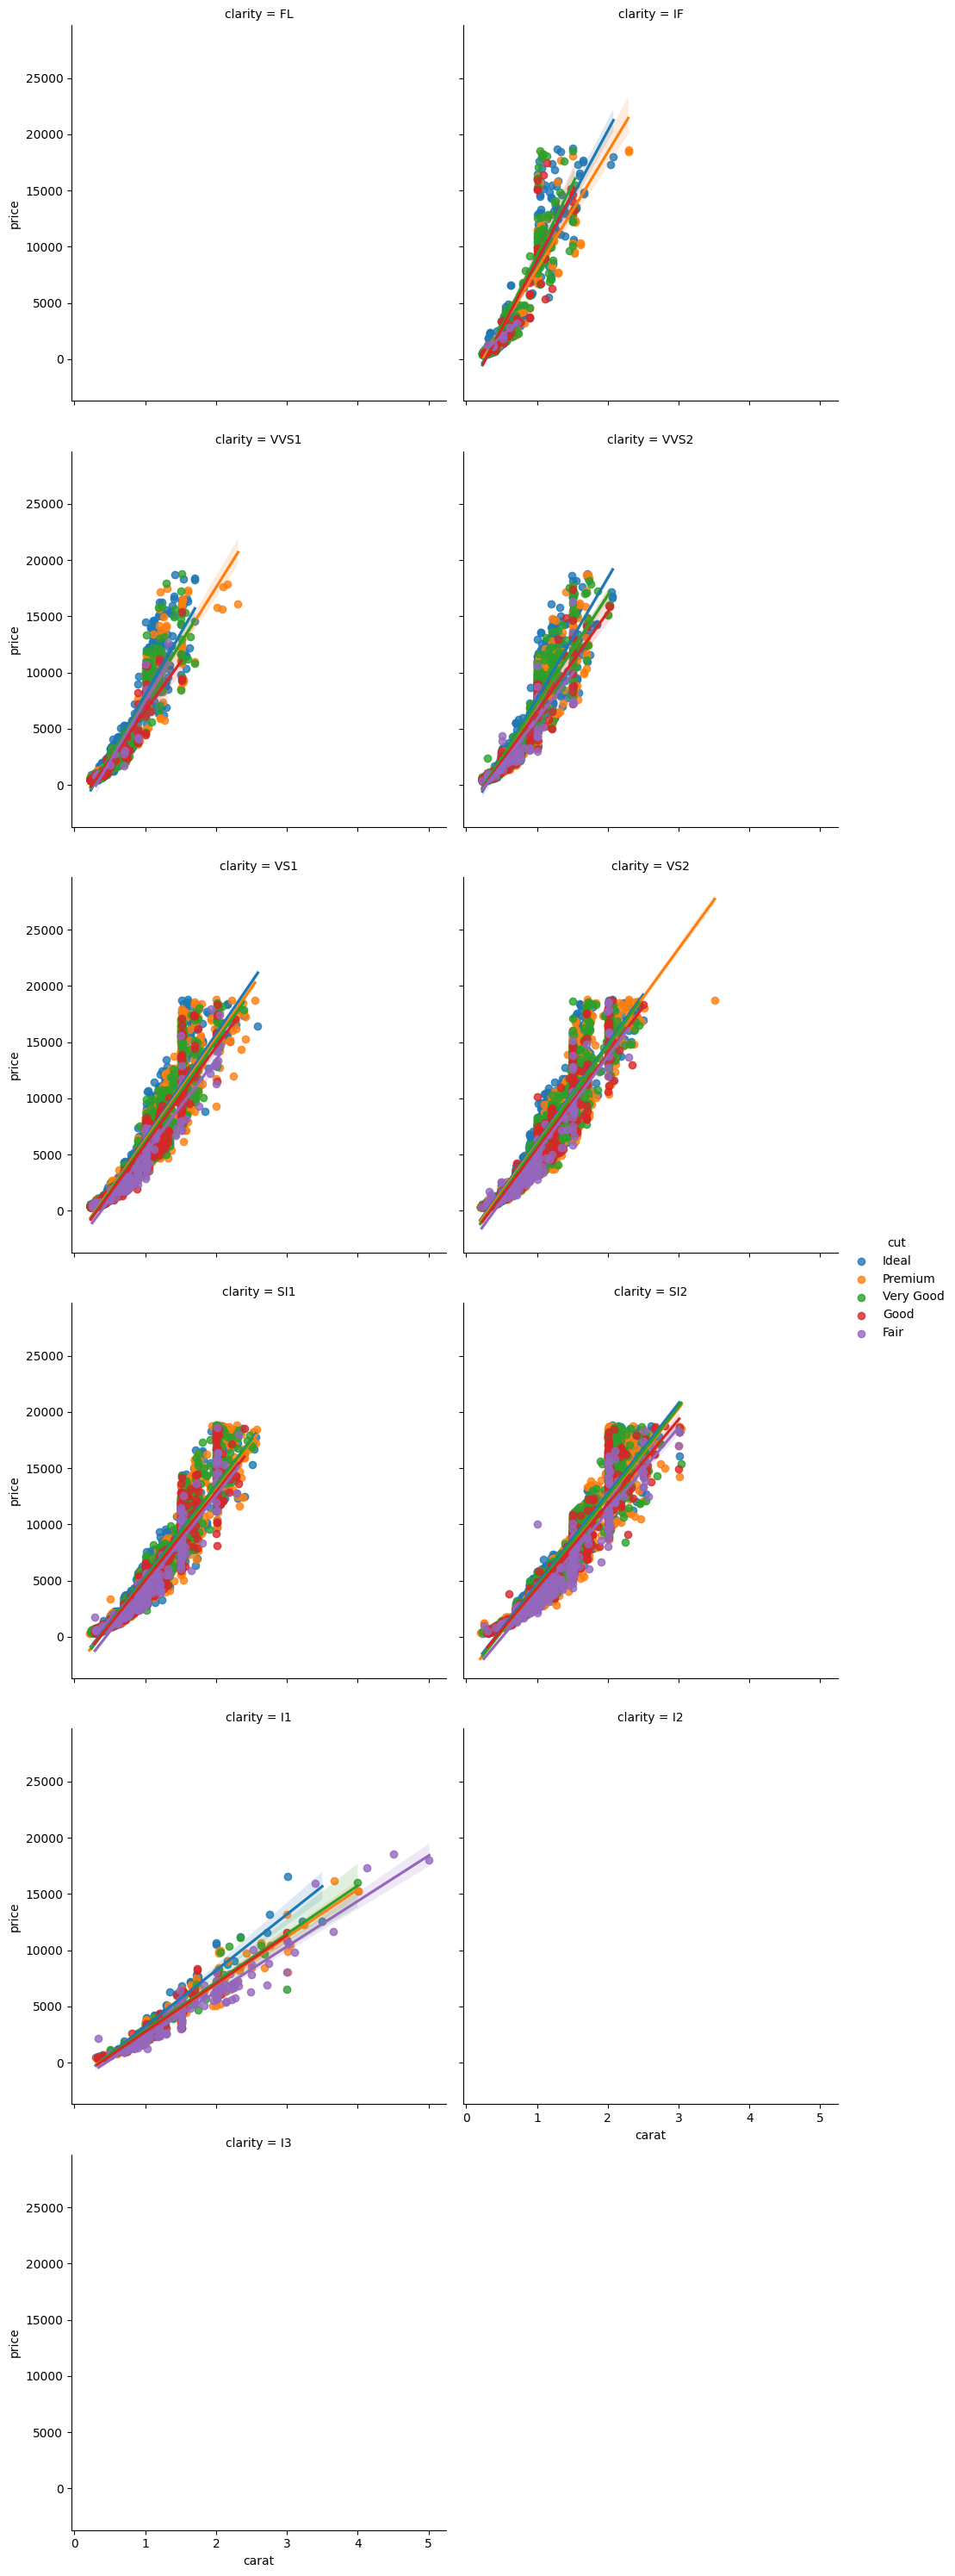

In [15]:
# Построим график с регрессионной линией для каратности камня и его цены с помощью функции lmplot, разделим на под-графики по чистоте камня
order = ['FL', 'IF', 'VVS1',  'VVS2',  'VS1',  'VS2',  'SI1', 'SI2', 'I1', 'I2', 'I3']

sns.lmplot(data=data, x='carat', y='price', col='clarity', col_wrap=2, hue='cut', col_order=order)

# Попарные графики - Pair Plots

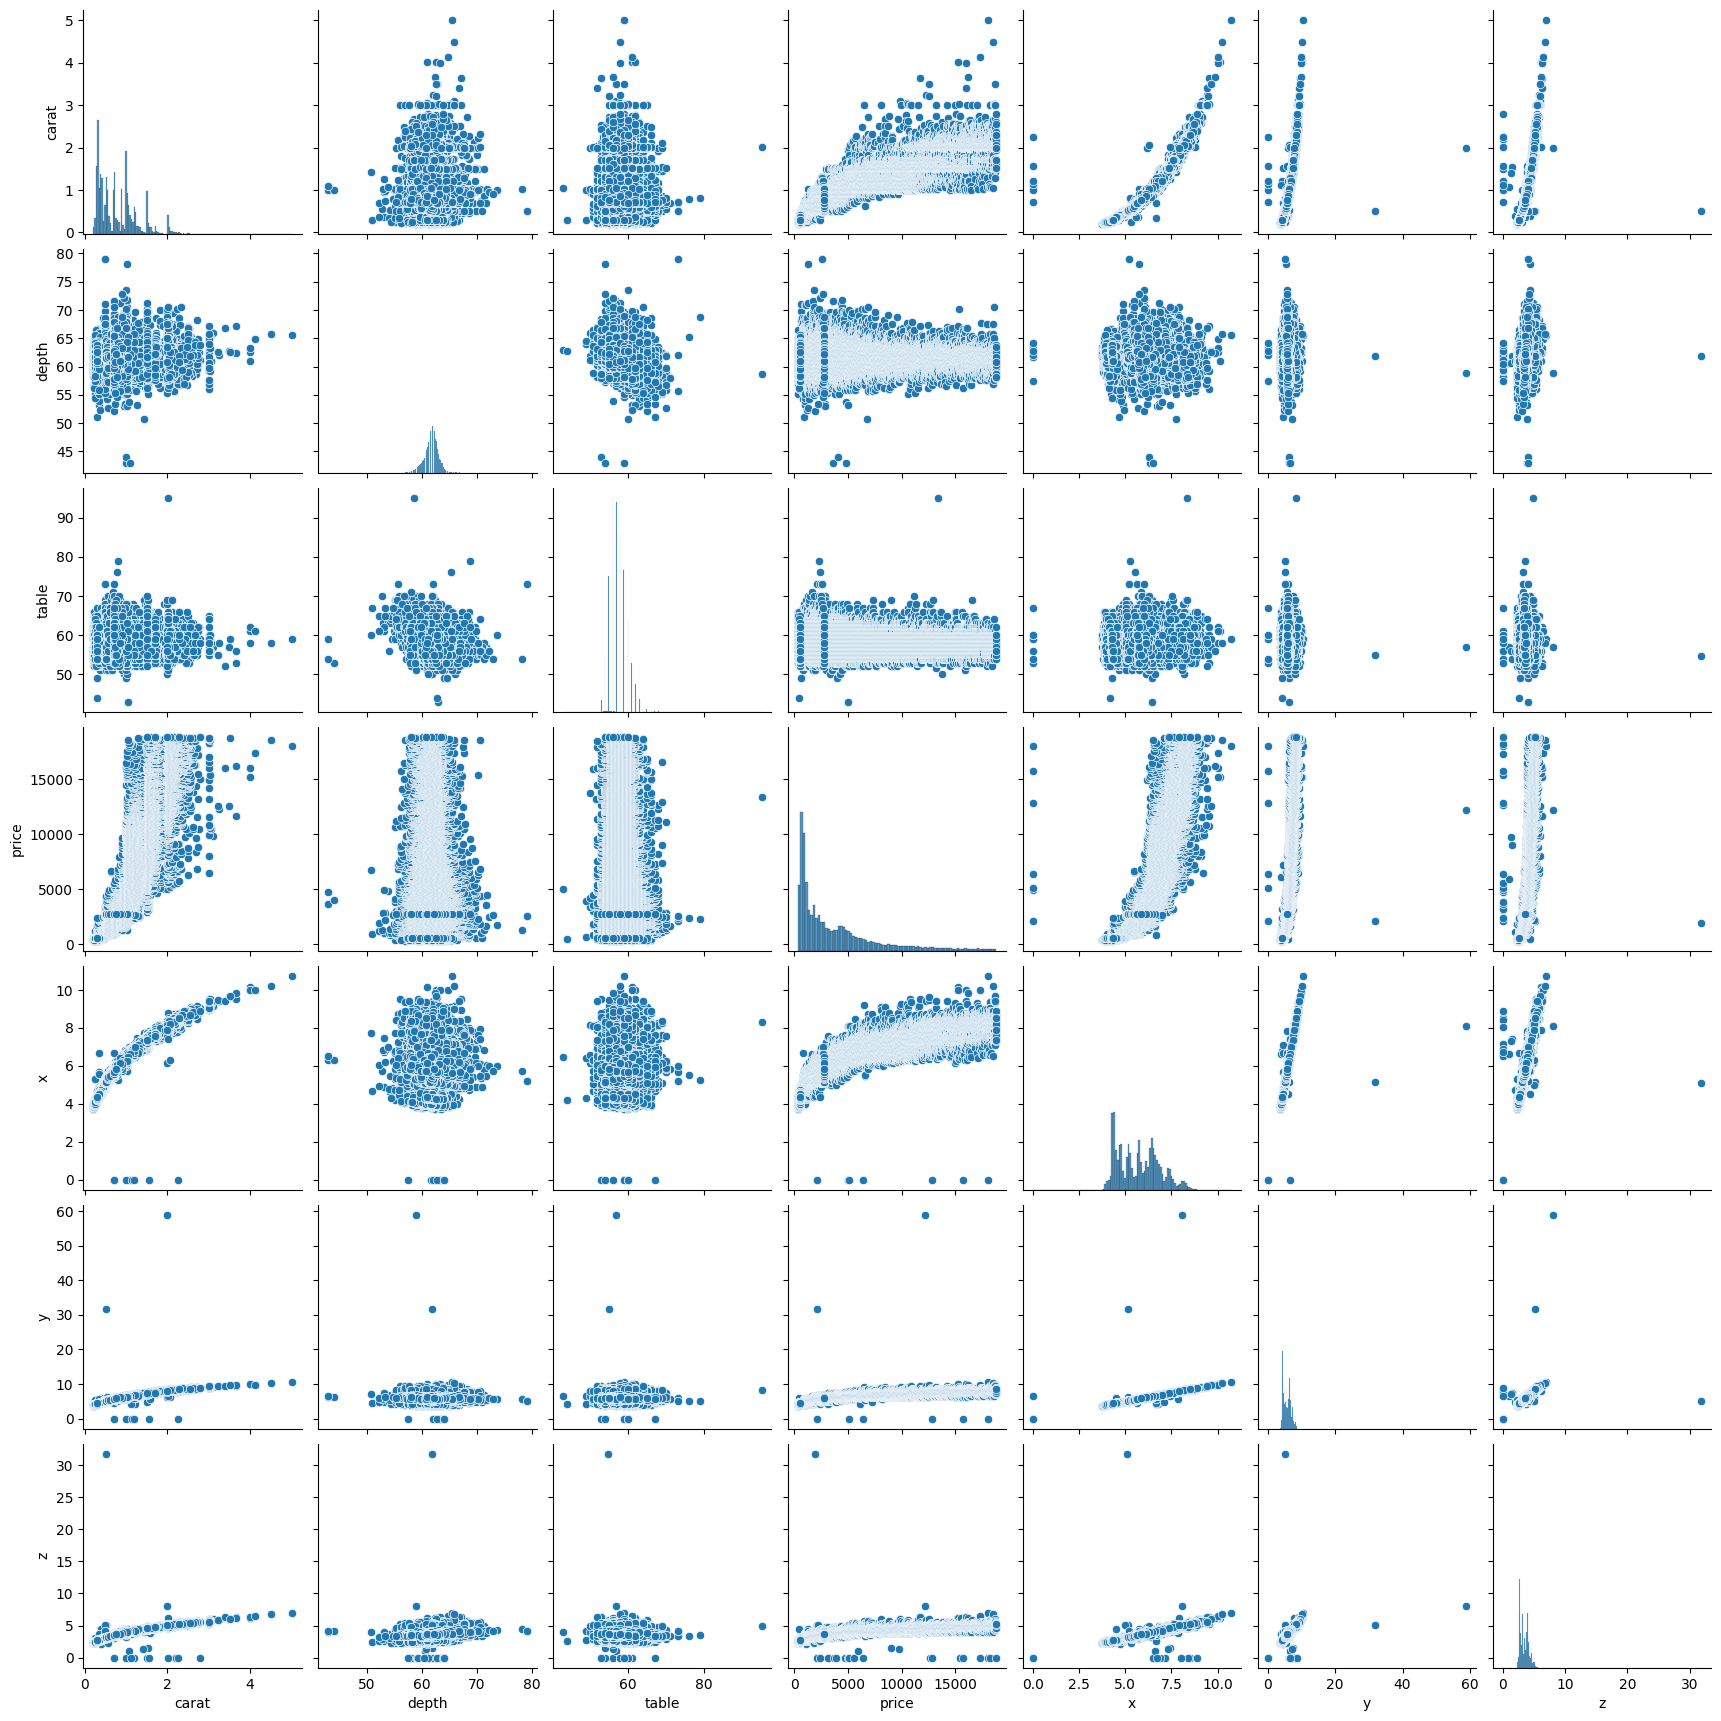

In [16]:
# Посмотрим попарные точечные графики для всех числовых переменных, где графики на диагональных значениях - это гистограммы с распределением переменной.
sns.pairplot(data)

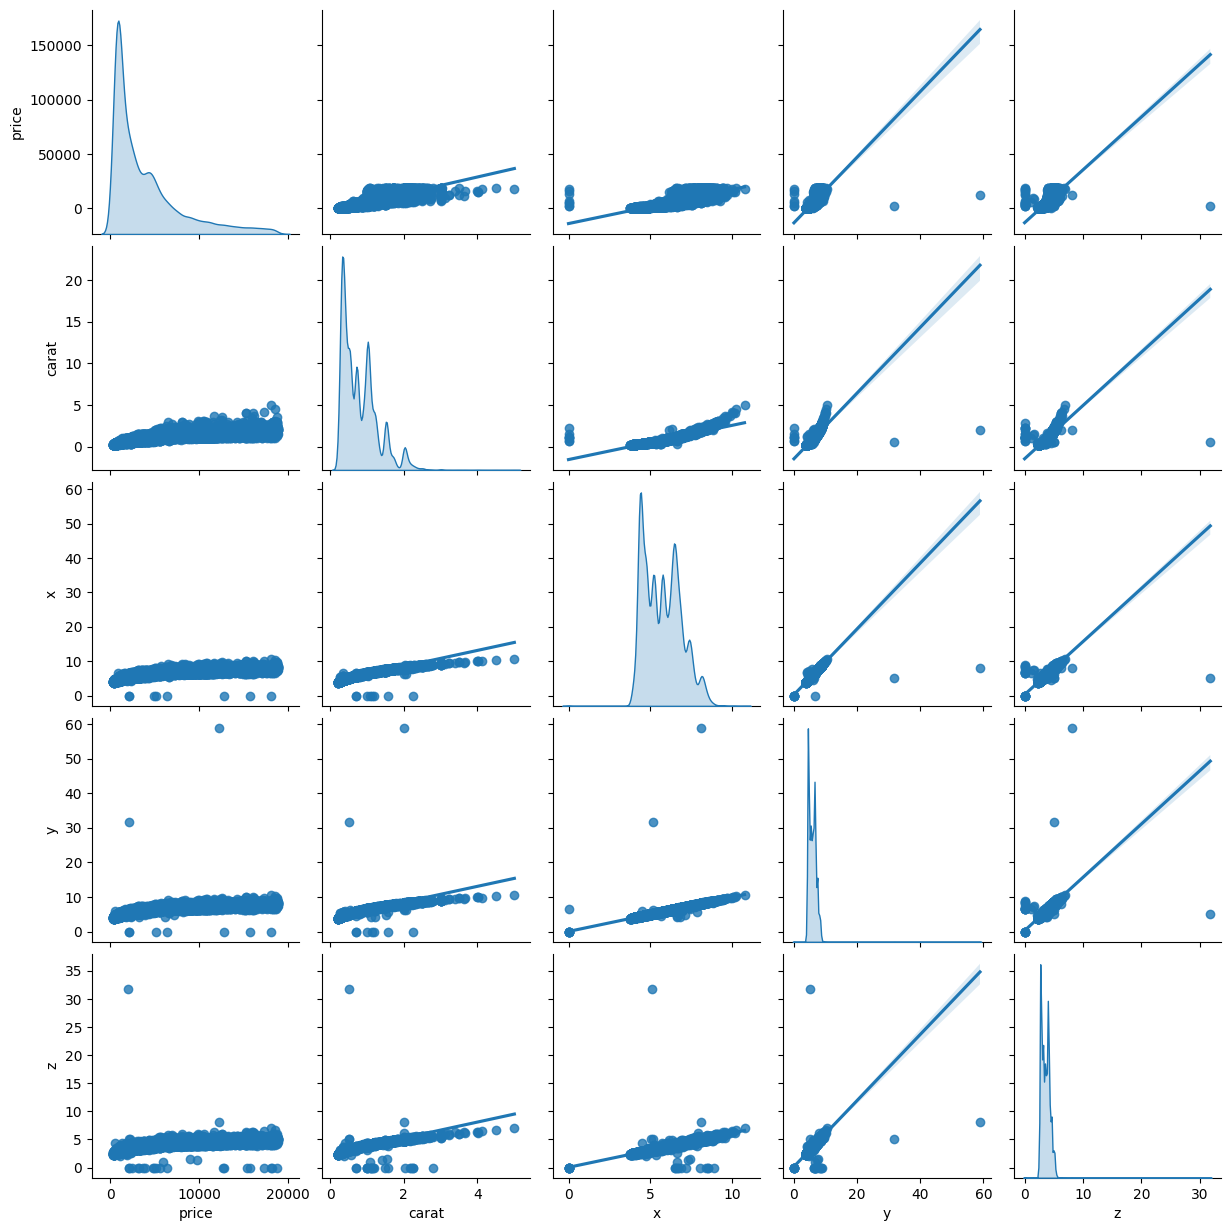

In [17]:
# Посмотрим попарные точечные графики для всех числовых переменных, где графики на диагональных значениях - это гистограммы с распределением переменной.
sns.pairplot(data, vars=['price', 'carat', 'x', 'y', 'z'], kind='reg', diag_kind='kde' )

#  Смежные графики - Joint Plots

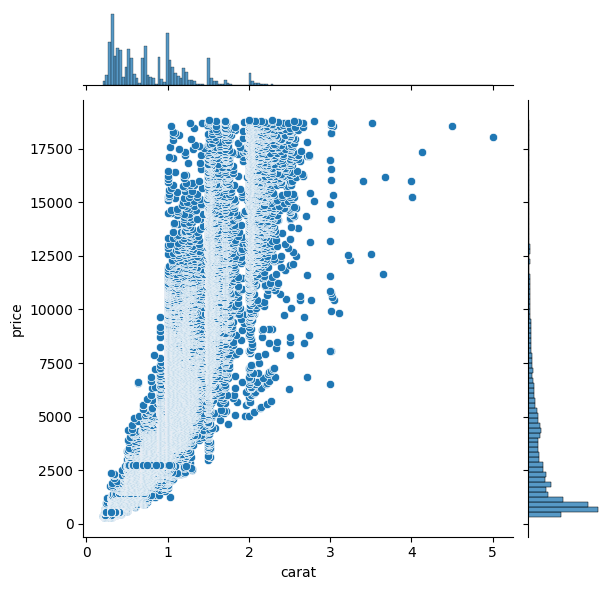

In [18]:
sns.jointplot(data=data, x='carat', y='price')

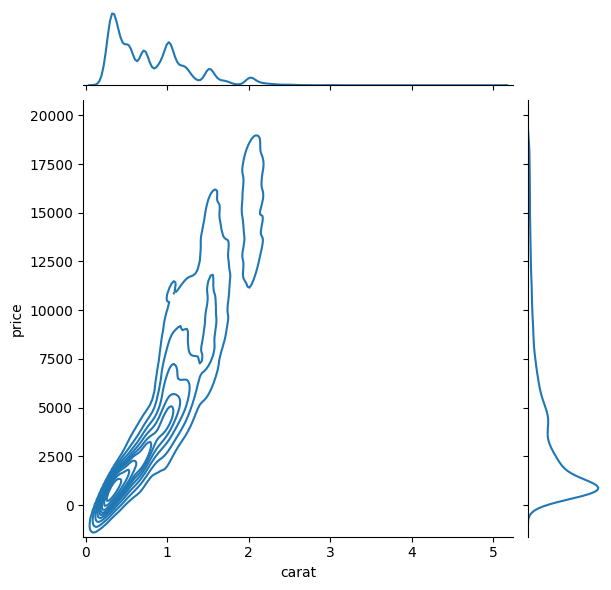

In [19]:
sns.jointplot(data=data, x='carat', y='price', kind='kde')

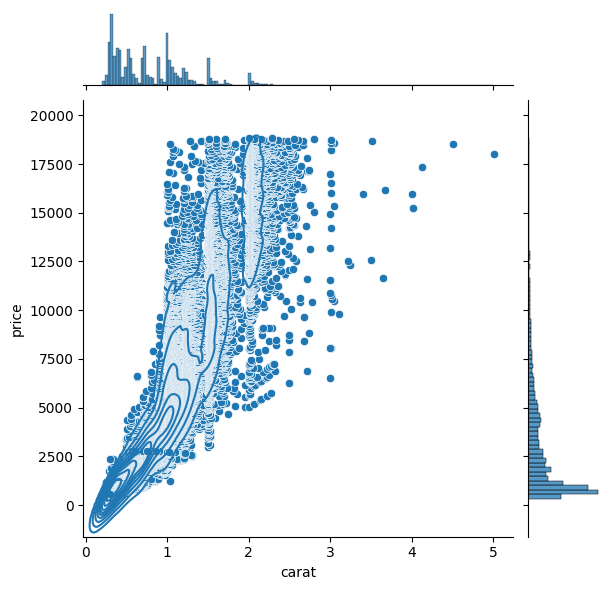

In [20]:
g = sns.jointplot(data=data, x='carat', y='price').plot_joint(sns.kdeplot)